# Decision trees lab

Let's create the data set

In [4]:
import random
import pandas as pd
random.seed(123)
age_0 = pd.DataFrame([19])
age_1 = pd.DataFrame(sorted(random.sample(range(18, 50), 20)))
age_2 = pd.DataFrame(sorted(random.sample(range(35, 70), 20)))
age_3 = pd.DataFrame([68])

age = age_0.append(age_1, ignore_index= True)
age = age.append(age_2, ignore_index= True)
age = age.append(age_3, ignore_index= True)

label_1 = pd.DataFrame([0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
label_2 = pd.DataFrame([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1])

label = label_1.append(label_2, ignore_index=True)
data = pd.concat([age, label], axis=1)

data.columns = ['age', 'label']

In [6]:
data

,age,label
0,19,0
1,19,1
2,20,0
3,21,1
4,22,0
5,23,0
6,26,0
7,28,0
8,29,0
9,30,0


In [753]:
def split(col_name, value, data):
    data_left = data.loc[data[col_name] <= value]
    data_right = data.loc[data[col_name] > value]
    return data_left, data_right

In [754]:
data_left, data_right = split("age", 49, data)

In [755]:
def gini_score(data_left, data_right):
    size_left= len(data_left)
    size_right = len(data_right)
    n_samples = size_left + size_right
    p_0L = (data_left['label']==0).sum() / size_left
    p_1L = (data_left['label'] == 1).sum() / size_left
    p_0R = (data_right['label'] == 0).sum() / size_right
    p_1R = (data_right['label'] == 1).sum() / size_right
    score_L = p_0L*p_0L+p_1L*p_1L
    score_R = p_0R*p_0R+p_1R*p_1R
    gini_L = 1- score_L
    gini_R = 1- score_R
    weight_gini_L = gini_L * (size_left / n_samples)
    weight_gini_R = gini_R * (size_right / n_samples)
    gain = weight_gini_L + weight_gini_R
    return gini_L, gini_R, gain

In [756]:
gini_score(data_left, data_right)

(0.46444444444444444, 0.2777777777777777, 0.4111111111111111)

In [748]:
def best_split(data, col_name):
    min_age = data[col_name].min()
    max_age = data[col_name].max()
    best_score = 999
    for i in range(min_age, max_age):
        data_left, data_right = split(col_name, i, data)
        gini_l, gini_r, gain = gini_score(data_left, data_right)
        if gain < best_score:
            best_val = i
            best_score = gain
            best_groups = data_left, data_right
    output = {}
    output['val'] = best_val 
    output['gini'] = best_score
    output['groups'] = best_groups  
    return output

In [749]:
best_split(data, "age")

{'gini': 0.4111111111111111, 'groups': (    age  label
  30   50      1
  31   53      1
  32   54      1
  33   59      1
  34   60      1
  35   62      1
  36   63      1
  37   64      1
  38   65      0
  39   67      1
  40   68      0
  41   68      1,     age  label
  0    19      0
  1    19      1
  2    20      0
  3    21      1
  4    22      0
  5    23      0
  6    26      0
  7    28      0
  8    29      0
  9    30      0
  10   31      0
  11   35      0
  12   37      0
  13   38      0
  14   39      0
  15   40      0
  16   42      0
  17   44      0
  18   46      0
  19   48      0
  20   49      0
  21   35      1
  22   36      1
  23   37      1
  24   38      1
  25   39      1
  26   44      1
  27   45      1
  28   47      1
  29   49      1), 'val': 49}

In [739]:
for i in range(min_age, max_age):
        data_left, data_right = split("age", i, data)
        data_l,data_r, gini = gini_score(data_left, data_right)
        print(i)   
        print(gini)


19
0.5
20
0.4957264957264958
21
0.5
22
0.4972972972972973
23
0.4907407407407407
24
0.4907407407407407
25
0.4907407407407407
26
0.4816326530612246
27
0.4816326530612246
28
0.47058823529411764
29
0.4579124579124579
30
0.4437499999999999
31
0.4281524926686217
32
0.4281524926686217
33
0.4281524926686217
34
0.4281524926686217
35
0.4350132625994695
36
0.4540816326530613
37
0.4567307692307693
38
0.4583333333333333
39
0.4590909090909091
40
0.4444444444444444
41
0.4444444444444444
42
0.4272727272727273
43
0.4272727272727273
44
0.42592592592592593
45
0.44235294117647056
46
0.4230769230769231
47
0.4395061728395062
48
0.4183673469387755
49
0.4111111111111111
50
0.4281524926686217
51
0.4281524926686217
52
0.4281524926686217
53
0.4437499999999999
54
0.4579124579124579
55
0.4579124579124579
56
0.4579124579124579
57
0.4579124579124579
58
0.4579124579124579
59
0.47058823529411764
60
0.4816326530612246
61
0.4816326530612246
62
0.4907407407407407
63
0.4972972972972973
64
0.5
65
0.4957264957264958
66
0.49

## TRYOUTS

In [615]:
def gini_impurity(group_1, group_2):
    n = len(group_1) + len(group_2)
    divide_class = np.array([sum(group_1), sum(group_2)])
    prop = np.array(divide_class)/n
    gini = 1-sum(prop * prop)
    return gini

In [616]:
    divide_class = np.array([sum(group_1), sum(group_2)])
    prop = np.array(divide_class)/n


In [617]:
ginis = gini_impurity(group_1, group_2)

Let's look at the gini for age 41

In [618]:
ginis = gini_impurity(group_1, group_2)

In [619]:
ls=[]
lower = data['age'].min()
upper = data['age'].max()
for i in range(lower, upper):
    group_1 = data['label'].loc[data['age'] > i]
    group_2 = data['label'].loc[data['age'] <= i]
    ginis = gini_impurity(group_1, group_2)
    ls.append(ginis)

In [620]:
# create split

## BEST SPLIT WIP

In [621]:
min_age = data['age'].min()
max_age = data['age'].max()
range(min_age, max_age)

range(19, 68)

In [622]:
def best_split(data, col_name):
    min_age = data[col_name].min()
    max_age = data[col_name].max()
    best_score = 999
    for i in range(min_age, max_age):
        data_left, data_right = split(col_name, i, data)
        gini = gini_score(data_left, data_right)
        if gini < best_score:
            best_val = i
            best_score = gini
            best_groups = data_left, data_right
    output = {}
    output['val'] = best_val 
    output['gini'] = best_score
    output['groups'] = best_groups  
    return output

In [629]:
output= best_split(data, "age")
output


{'gini': 0.24983563445101908, 'groups': (    age  label
  1    20      0
  2    21      1
  3    22      0
  4    23      0
  5    26      0
  6    28      0
  7    29      0
  8    30      0
  9    31      0
  10   35      0
  11   37      0
  12   38      0
  13   39      0
  14   40      0
  15   42      0
  16   44      0
  17   46      0
  18   48      0
  19   49      0
  20   35      1
  21   36      1
  22   37      1
  23   38      1
  24   39      1
  25   44      1
  26   45      1
  27   47      1
  28   49      1
  29   50      1
  30   53      1
  31   54      1
  32   59      1
  33   60      1
  34   62      1
  35   63      1
  36   64      1
  37   65      0
  38   67      1
  39   68      0,    age  label
  0   19      1), 'val': 19}

## Using scikit learn

In [740]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 1)
clf = clf.fit(data['age'].reshape(-1, 1), data['label'])

/Users/anneleendirick/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [741]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [742]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

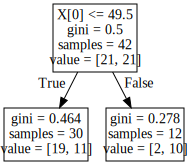

In [743]:
export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# compute the gini index 

In [331]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

In [ ]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

In [516]:
def split(col, value, data):
    data = np.array(data)
    data_left = np.array([]).reshape(0,data.shape[1])
    data_right = np.array([]).reshape(0,data.shape[1])
    for i in data:
        if i[col] <= value:
            data_left = np.vstack((data_left,i))
        if i[col] > value:
            data_right = np.vstack((data_right,i))
    return data_left, data_right

In [520]:
data_left, data_right = split(0,41,data)

In [501]:
?np.vstack

In [521]:
data_left

array([[19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  0.],
       [23.,  0.],
       [26.,  0.],
       [28.,  0.],
       [29.,  0.],
       [30.,  0.],
       [31.,  0.],
       [35.,  0.],
       [37.,  0.],
       [38.,  0.],
       [39.,  0.],
       [40.,  0.],
       [35.,  1.],
       [36.,  1.],
       [37.,  1.],
       [38.,  1.],
       [39.,  1.]])

# Sources
https://www.svds.com/machine-learning-vs-statistics/ https://github.com/xbno/Projects/blob/master/Models_Scratch/Decision%20Trees%20from%20scratch.ipynb